In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
! pip install --upgrade tensorflow

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

The CIFAR-10 dataset consists of 60000 32*32 colour images in 10 classes, with 6000 images per class

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
# existing shape of y_train is 50,000 * 1
# 1st param to reshape is -1 because we need to retain 50,000 as it is
# 2nd param is nothing because we need to remove the array that has one element like [6]
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
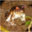

In [11]:
X_train[0]

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

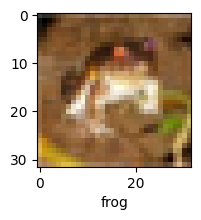

In [15]:
plot_sample(X_train, y_train, 0)

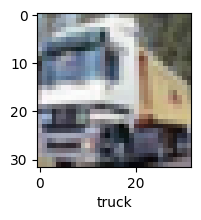

In [16]:
plot_sample(X_train, y_train, 1)

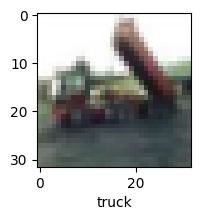

In [17]:
plot_sample(X_train, y_train, 2)

Nomalize Data - Divide each pixel in the image by 255


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
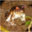

In [18]:
X_train[0]

In [19]:
type(X_train[0])

numpy.ndarray

In [20]:
X_train = X_train / 255
X_test = X_test / 255

ANN - Let's use ANN first and monitor the performance, next let's try with CNN

In [21]:
# Sequential: because we are creating a stack of layers in Neural Network, where each layer in an element
# Dense: Because every node in one layer and connected to every other layer in next layer
# 10 is # of output neurons


ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

# optimizer
# sparse means our output variable which is y_train is an int
# just 'categorical_crossentropy' means that the out put is either 1 or 0
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.3074 - loss: 1.9223
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.4152 - loss: 1.6466
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 49ms/step - accuracy: 0.4557 - loss: 1.5484
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.4752 - loss: 1.4899
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.4990 - loss: 1.4282


In [22]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4692 - loss: 1.4801


[1.4842503070831299, 0.46320000290870667]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.38      0.49      1000
           1       0.67      0.50      0.57      1000
           2       0.41      0.23      0.30      1000
           3       0.39      0.19      0.25      1000
           4       0.37      0.52      0.43      1000
           5       0.29      0.59      0.39      1000
           6       0.51      0.58      0.54      1000
           7       0.67      0.40      0.50      1000
           8       0.45      0.78      0.57      1000
           9       0.62      0.47      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [24]:
cnn = models.Sequential([

    #cnn - set 1
    # kernel_size - size of each filter matrix
    layers.Conv2D(filters=50, kernel_size=(3, 3), activtation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    #cnn - set 2
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

cnn.fit(X_train, y_train, epochs = 20)

SyntaxError: positional argument follows keyword argument (<ipython-input-24-3ac9e28463c1>, line 9)

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmanz(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]